In [26]:
import pandas as pd
import numpy as np

kobe_df = pd.read_csv('data.csv')

In [27]:
kobe_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [28]:
kobe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
#Plot No. 1 courtesy of Kaggle User: yoonkanglow
kobe_missed = kobe_df[kobe_df.shot_made_flag==0].season.value_counts().sort_index() # creates df with missed shots
kobe_made = kobe_df[kobe_df.shot_made_flag==1].season.value_counts().sort_index() # creates df with made shots

kobe_shots = pd.concat([kobe_made,kobe_missed],axis = 1)
kobe_shots.columns = ['Made','Missed']



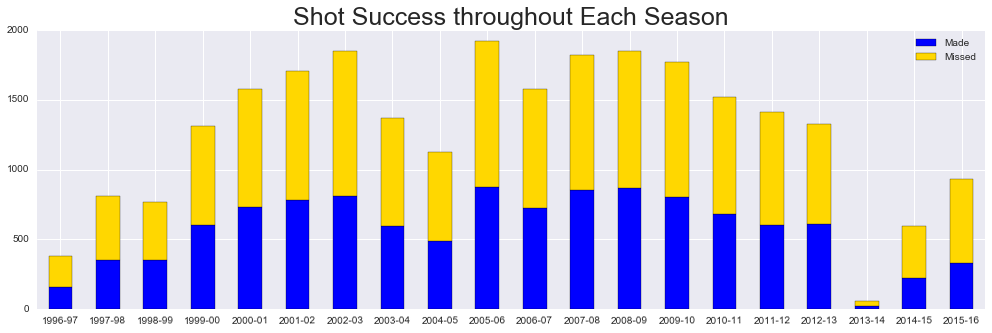

In [178]:
#Plot a graph of missed and successful shots per season
fig = plt.figure(figsize=(17,5))
kobe_shots.plot(ax=fig.gca(), kind='bar',stacked=True,rot=1,color=['#0000ff','#ffd700'])
plt.title('Shot Success throughout Each Season', fontsize = 25)

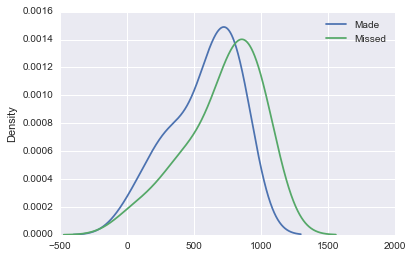

In [42]:
#Estimate the Kernel Density of shots made and miss throughout his career. It looks to be normally distributed.
kobe_shots.plot(kind='kde',stacked=False)

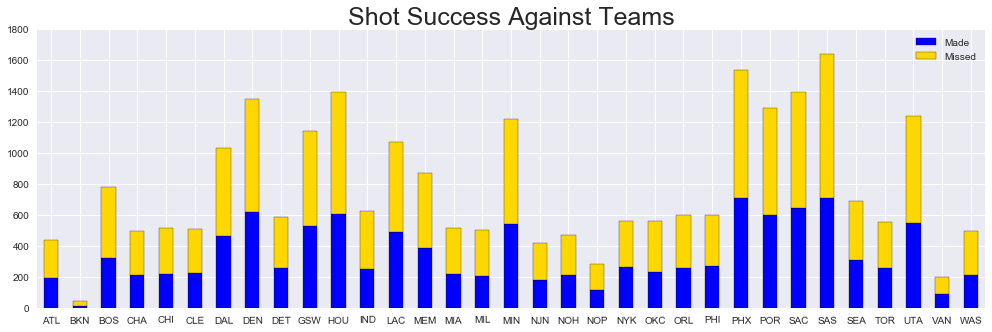

In [179]:
#Look at shots against each opponent
kobe_team_missed = kobe_df[kobe_df.shot_made_flag==0].opponent.value_counts().sort_index() # creates df with missed shots
kobe_team_made = kobe_df[kobe_df.shot_made_flag==1].opponent.value_counts().sort_index() # creates df with made shots

kobe_team_shots = pd.concat([kobe_team_made,kobe_team_missed],axis = 1)
kobe_team_shots.columns = ['Made','Missed']

fig = plt.figure(figsize=(17,5))
kobe_team_shots.plot(ax=fig.gca(), kind='bar',stacked=True,rot=1,color=['#0000ff','#ffd700'])
plt.title('Shot Success Against Teams', fontsize = 25)

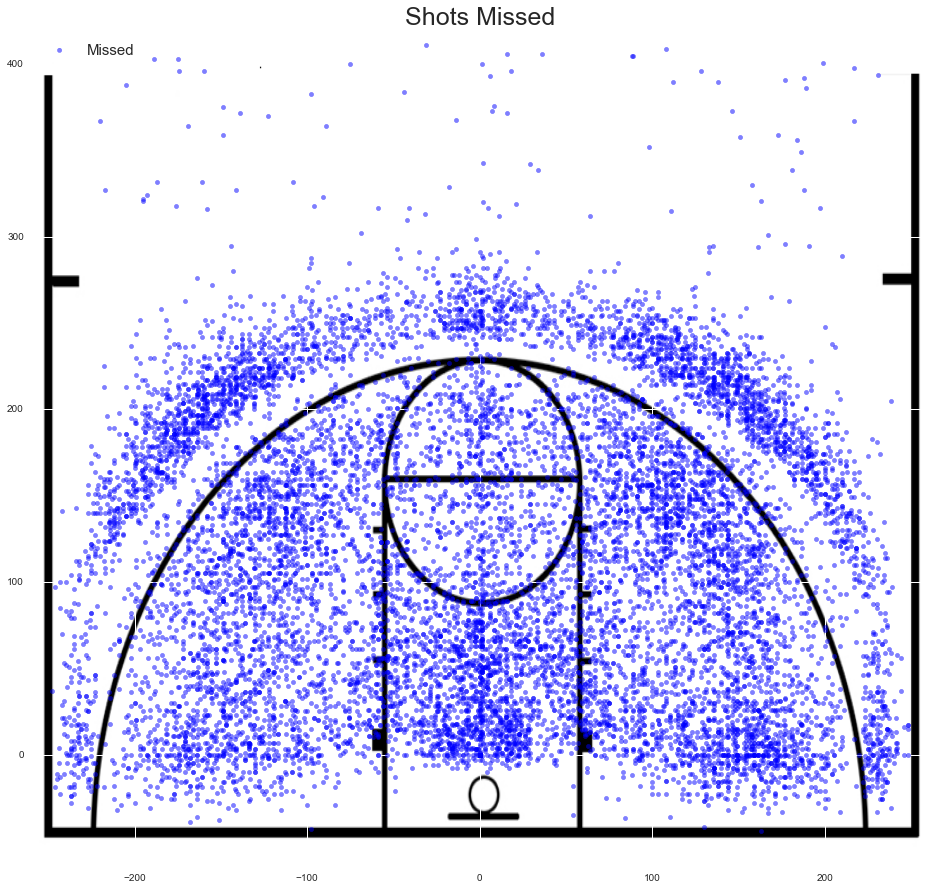

In [192]:
# Map of shots missed by Kobe throughout his career
plt.figure(figsize=(20,15))
plt.scatter(kobe_df[kobe_df.shot_made_flag==0].loc_x,kobe_df[kobe_df.shot_made_flag==0].loc_y, alpha = 0.5, label = 'Missed',
color = '#0000ff')
from scipy.misc import imread
import matplotlib.cbook as cbook
#datafile = cbook.get_sample_data("court.png")
img = imread("court.png")
#plt.imshow(img)
plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])
#plt.show()

plt.legend(fontsize=15, loc = 'upper left')
plt.title('Shots Missed', fontsize = 25)

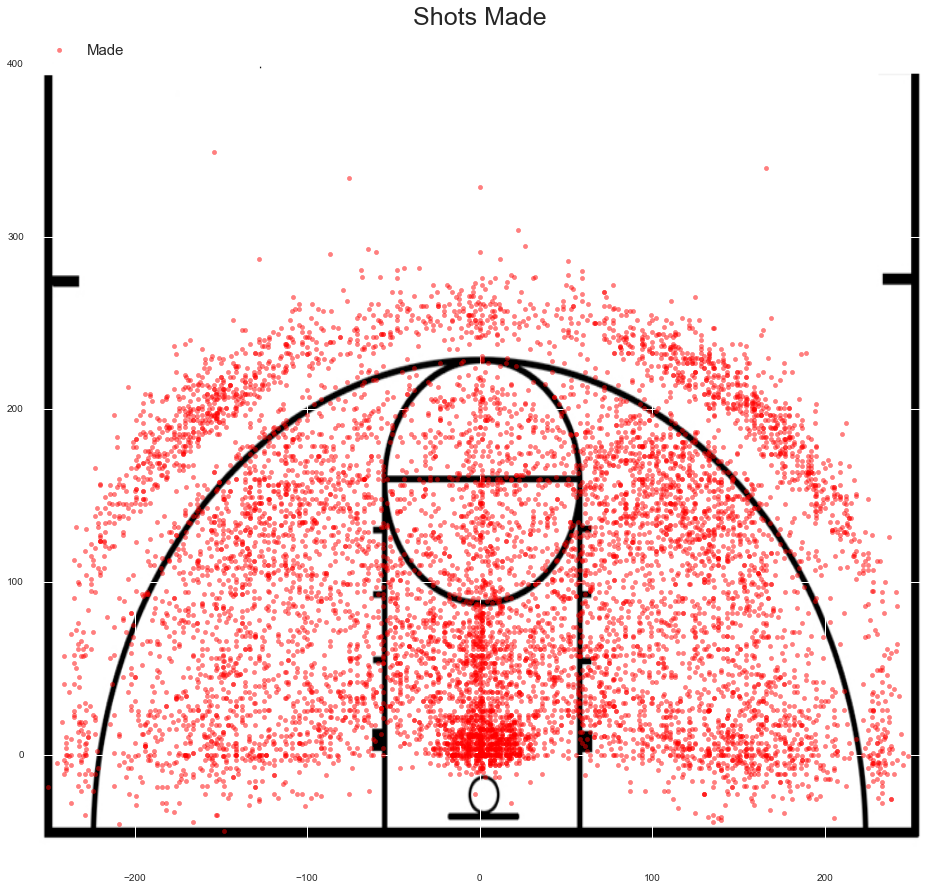

In [193]:
plt.figure(figsize=(20,15))
plt.scatter(kobe_df[kobe_df.shot_made_flag==1].loc_x,kobe_df[kobe_df.shot_made_flag==1].loc_y, alpha = 0.5, label = 'Made',
color = '#ff0000')
from scipy.misc import imread
import matplotlib.cbook as cbook
#datafile = cbook.get_sample_data("court.png")
img = imread("court.png")
#plt.imshow(img)
plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])
#plt.show()

plt.legend(fontsize=15, loc = 'upper left')
plt.title('Shots Made', fontsize = 25)

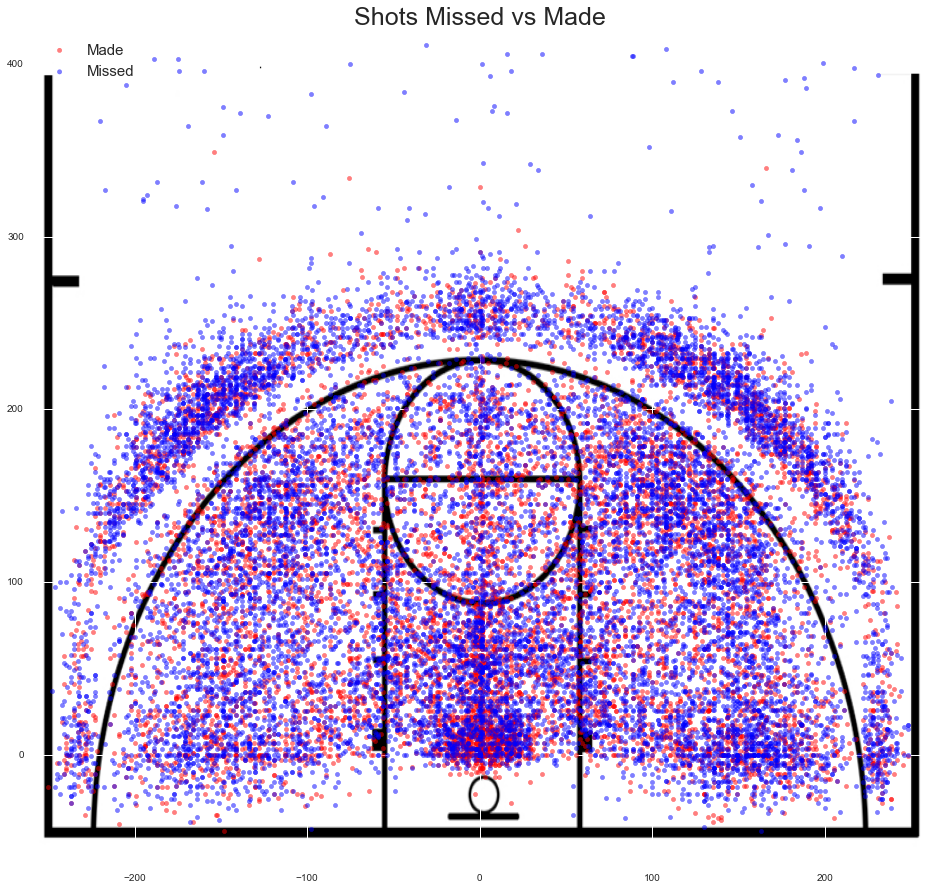

In [194]:
plt.figure(figsize=(20,15))

plt.scatter(kobe_df[kobe_df.shot_made_flag==1].loc_x,kobe_df[kobe_df.shot_made_flag==1].loc_y, alpha = 0.5, label = 'Made',
color = '#ff0000')
plt.scatter(kobe_df[kobe_df.shot_made_flag==0].loc_x,kobe_df[kobe_df.shot_made_flag==0].loc_y, alpha = 0.5, label = 'Missed',
color = '#0000ff')

from scipy.misc import imread
import matplotlib.cbook as cbook
#datafile = cbook.get_sample_data("court.png")
img = imread("court.png")
#plt.imshow(img)
plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])
#plt.show()

plt.legend(fontsize=15, loc = 'upper left')
plt.title('Shots Missed vs Made', fontsize = 25)

In [122]:
kobe_shots.sum(axis=0)
#Kobe has made 80% of his total career shots


Made      11465
Missed    14232
dtype: int64

# Examination of shot types

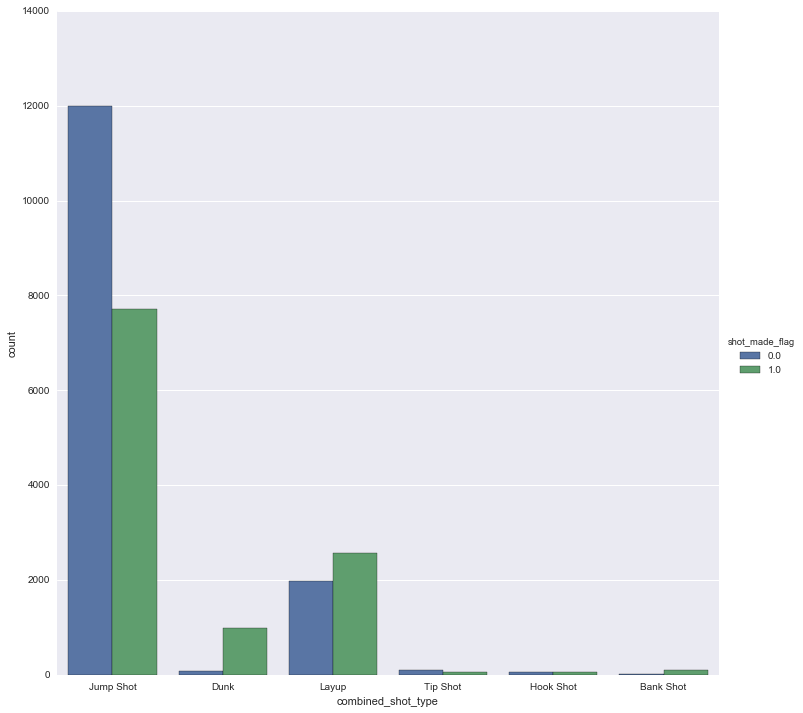

In [196]:
sns.factorplot('combined_shot_type', data = kobe_df, kind = 'count', hue = 'shot_made_flag', size = 10)

# Map of shot types

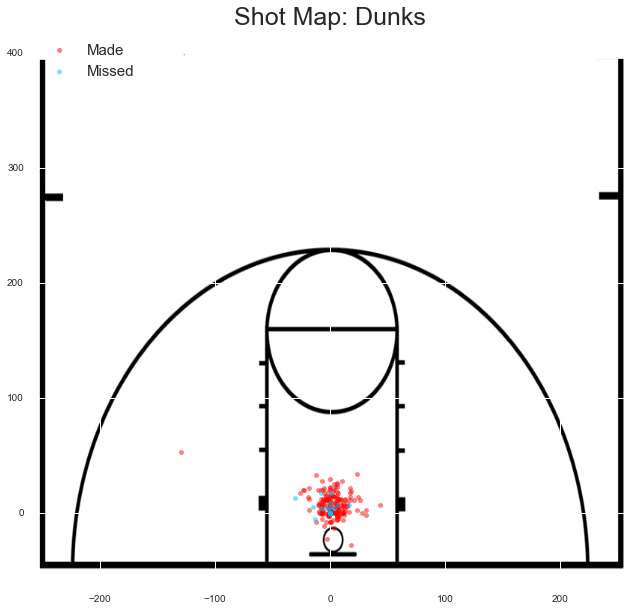

In [172]:
plt.figure(figsize=(15,10))

plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Dunk')&(kobe_df.shot_made_flag==1)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Dunk')&(kobe_df.shot_made_flag==1)].loc_y, alpha = 0.5, label = 'Made',
color = '#ff0000')
plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Dunk')&(kobe_df.shot_made_flag==0)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Dunk')&(kobe_df.shot_made_flag==0)].loc_y, alpha = 0.5, label = 'Missed',
color = '#00bfff')

from scipy.misc import imread
import matplotlib.cbook as cbook

img = imread("court.png")

plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])

plt.title('Shot Map: Dunks', fontsize=25)
plt.legend(fontsize=15, loc = 'upper left')

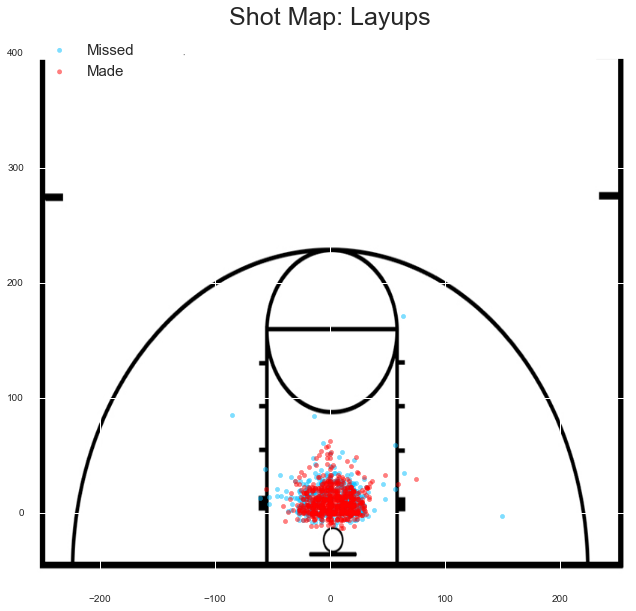

In [171]:
plt.figure(figsize=(15,10))


plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Layup')&(kobe_df.shot_made_flag==0)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Layup')&(kobe_df.shot_made_flag==0)].loc_y, alpha = 0.5, label = 'Missed',
color = '#00bfff')
plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Layup')&(kobe_df.shot_made_flag==1)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Layup')&(kobe_df.shot_made_flag==1)].loc_y, alpha = 0.5, label = 'Made',
color = '#ff0000')

from scipy.misc import imread
import matplotlib.cbook as cbook

img = imread("court.png")

plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])

plt.title('Shot Map: Layups', fontsize=25)
plt.legend(fontsize=15, loc = 'upper left')

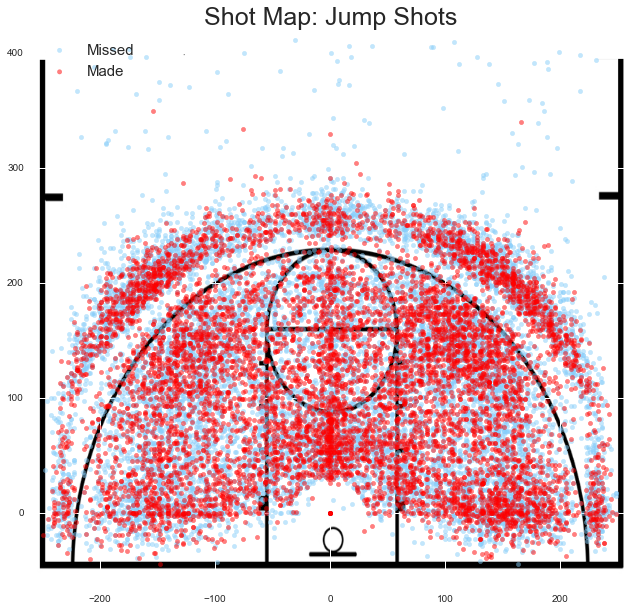

In [167]:
plt.figure(figsize=(15,10))


plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Jump Shot')&(kobe_df.shot_made_flag==0)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Jump Shot')&(kobe_df.shot_made_flag==0)].loc_y, alpha = 0.5, label = 'Missed',
color = '#87cefa')
plt.scatter(kobe_df[(kobe_df.combined_shot_type=='Jump Shot')&(kobe_df.shot_made_flag==1)].loc_x,kobe_df[(kobe_df.combined_shot_type=='Jump Shot')&(kobe_df.shot_made_flag==1)].loc_y, alpha = 0.5, label = 'Made',
color = '#ff0000')

from scipy.misc import imread
import matplotlib.cbook as cbook

img = imread("court.png")

plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])

plt.title('Shot Map: Jump Shots', fontsize=25)
plt.legend(fontsize=15, loc = 'upper left')

# Distribution of shots by location

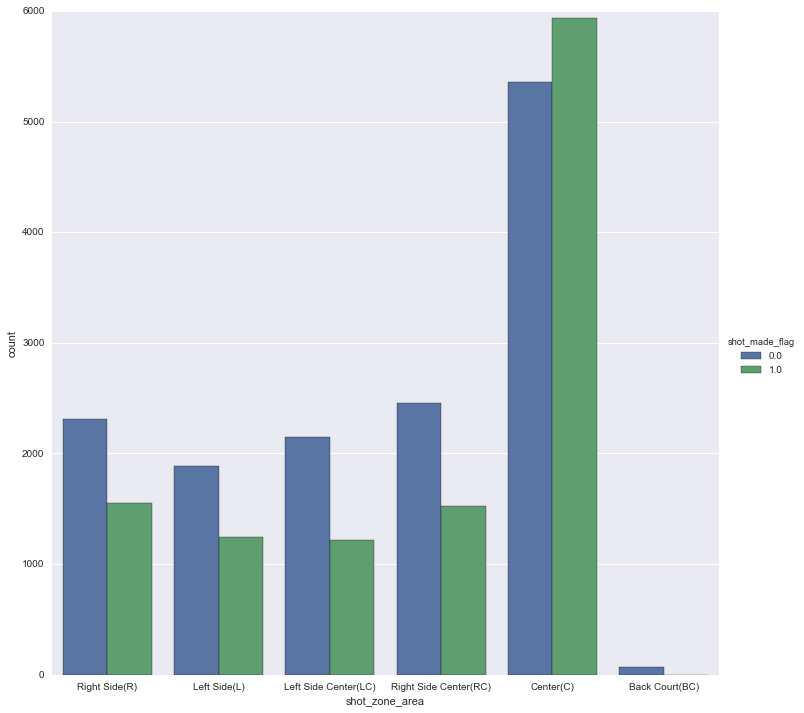

In [181]:
sns.factorplot('shot_zone_area', data = kobe_df, kind = 'count', hue = 'shot_made_flag', size = 10)

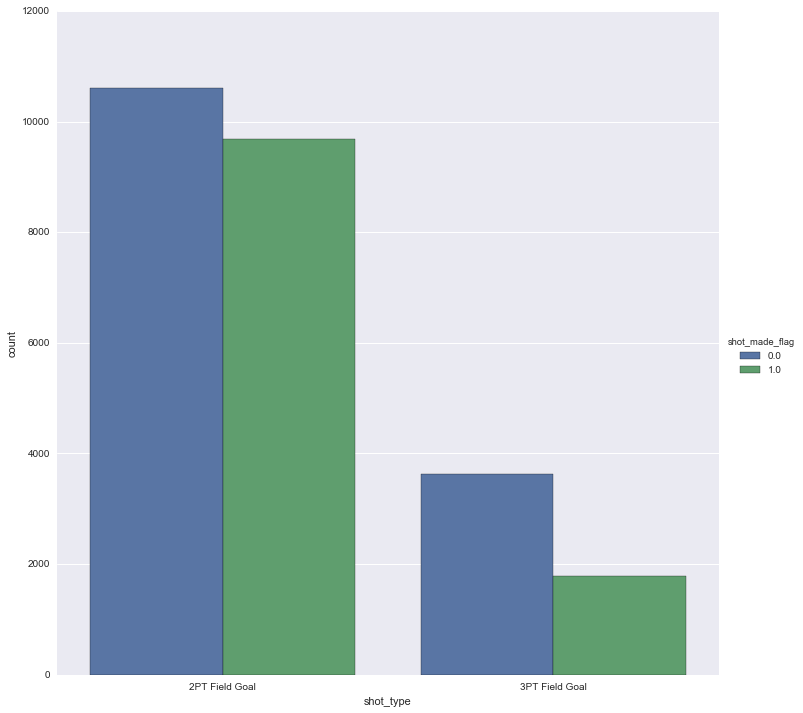

In [182]:
sns.factorplot('shot_type', data = kobe_df, kind = 'count', hue = 'shot_made_flag', size = 10)

# 3 vs 2 Point Field Goals

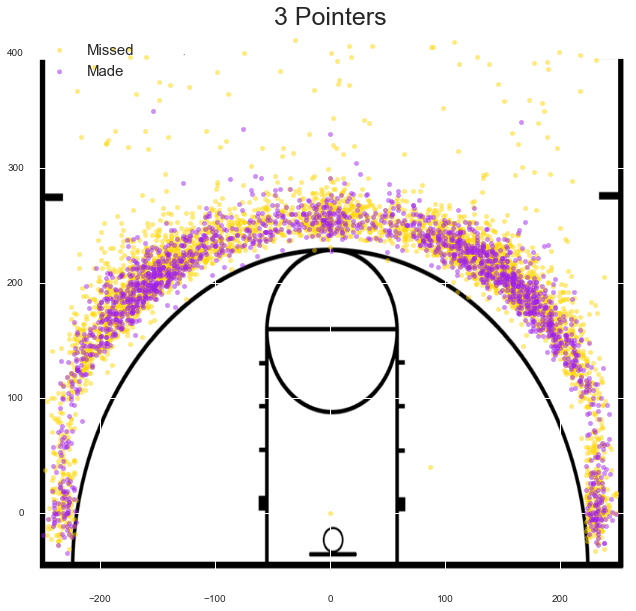

In [190]:
plt.figure(figsize=(15,10))


plt.scatter(kobe_df[(kobe_df.shot_type=='3PT Field Goal')&(kobe_df.shot_made_flag==0)].loc_x,kobe_df[(kobe_df.shot_type=='3PT Field Goal')&(kobe_df.shot_made_flag==0)].loc_y, alpha = 0.5, label = 'Missed',
color = '#ffd700')
plt.scatter(kobe_df[(kobe_df.shot_type=='3PT Field Goal')&(kobe_df.shot_made_flag==1)].loc_x,kobe_df[(kobe_df.shot_type=='3PT Field Goal')&(kobe_df.shot_made_flag==1)].loc_y, alpha = 0.5, label = 'Made',
color = '#a020f0')

from scipy.misc import imread
import matplotlib.cbook as cbook

img = imread("court.png")

plt.imshow(img, zorder = 0, extent=[-260, 260, -65, 420])

plt.title('3 Pointers', fontsize=25)
plt.legend(fontsize=15, loc = 'upper left')

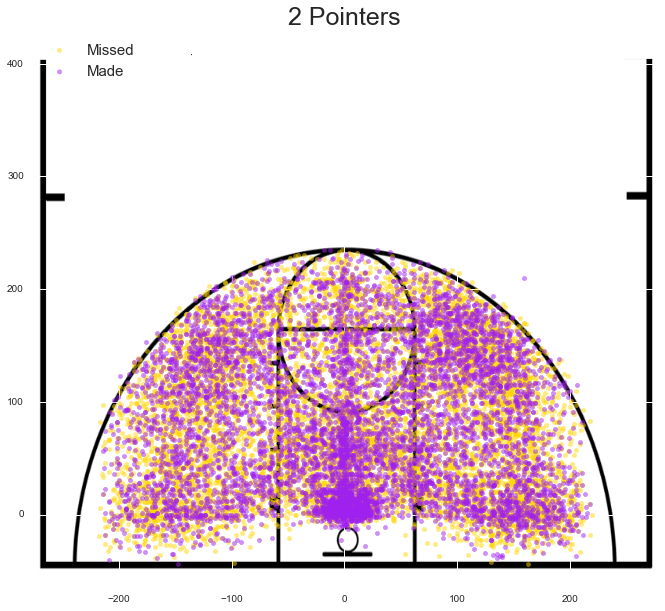

In [189]:
plt.figure(figsize=(15,10))


plt.scatter(kobe_df[(kobe_df.shot_type=='2PT Field Goal')&(kobe_df.shot_made_flag==0)].loc_x,kobe_df[(kobe_df.shot_type=='2PT Field Goal')&(kobe_df.shot_made_flag==0)].loc_y, alpha = 0.5, label = 'Missed',
color = '#ffd700')
plt.scatter(kobe_df[(kobe_df.shot_type=='2PT Field Goal')&(kobe_df.shot_made_flag==1)].loc_x,kobe_df[(kobe_df.shot_type=='2PT Field Goal')&(kobe_df.shot_made_flag==1)].loc_y, alpha = 0.5, label = 'Made',
color = '#a020f0')

from scipy.misc import imread
import matplotlib.cbook as cbook

img = imread("court.png")

plt.imshow(img, zorder = 0, extent=[-278, 278, -65, 430])

plt.title('2 Pointers', fontsize=25)
plt.legend(fontsize=15, loc = 'upper left')